In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap 
import h5py
from pylab import rc
from pyart.graph import cm
import gpmtools 
from gpmtools import *
import colormaps_new as cmaps

%matplotlib inline
%config InlineBackend.figure_format='retina'


##plot attributes 
rc('axes', linewidth=2.5)
lw = 1.5
lw2 = 1
lwp = 2
fontsize = 20 #label font size
fontsize2 = 14 #tick font size 
##



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# Plan view maps:

I have a code that makes planview maps with basemap. Not the prettiest. It plots the 3km Reflectivity (orginally designed for OLYMPEX, so i had to get above the mountains. 

Also, my pyart cmap doesnt include the HomeyerRainbow, so just replace yours accordingly

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/mpl_toolkit

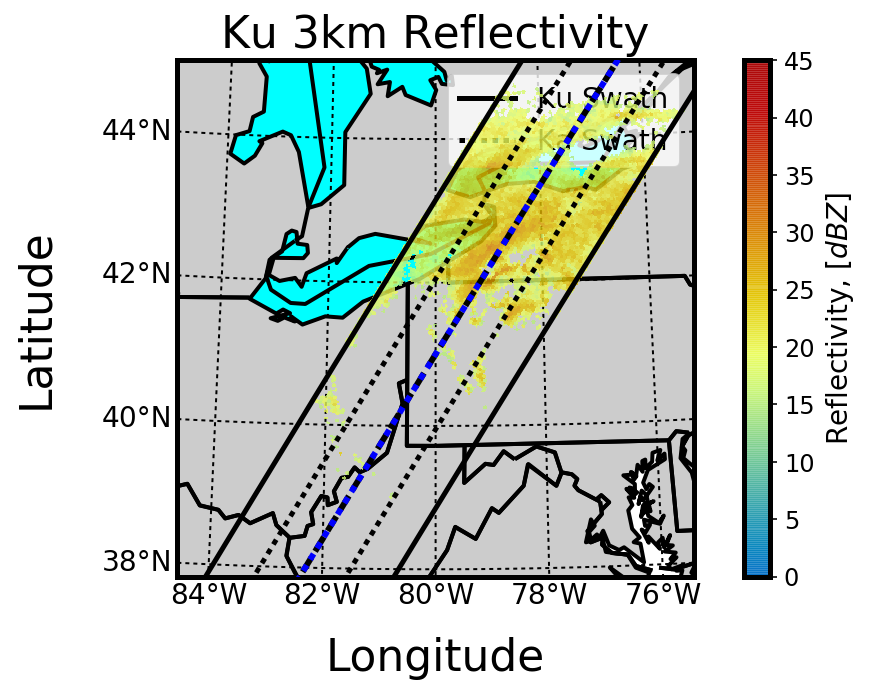

In [3]:
filename = '/data/keeling/a/randyjc2/gpm/GPM_datafiles/arthurhou.pps.eosdis.nasa.gov/gpmdata/2018/03/02/radar/2A.GPM.DPR.V7-20170308.20180302-S035023-E052255.022768.V05A.HDF5'
gpmtools.GPMDPR_planview(filename,Kuray = 24, Karay=12,Crossray=0,
                    figsize=(9,4.75),lw = 3,cmap =cmaps.HomeyerRainbow,zoom=1,lat_0 = '41.5',
                    lon_0 = '280',kaswath=True,vmin=0,vmax=45)

# file reader to dict.

In [4]:
data = gpmtools.GPMDPRread(filename)

# Cross-sections

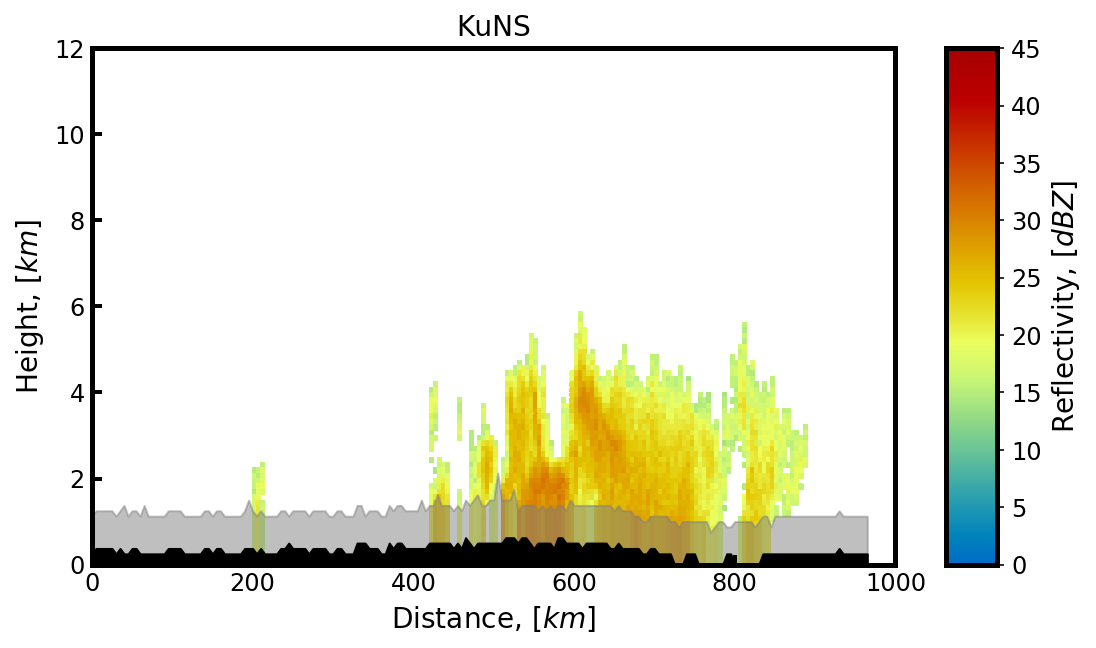

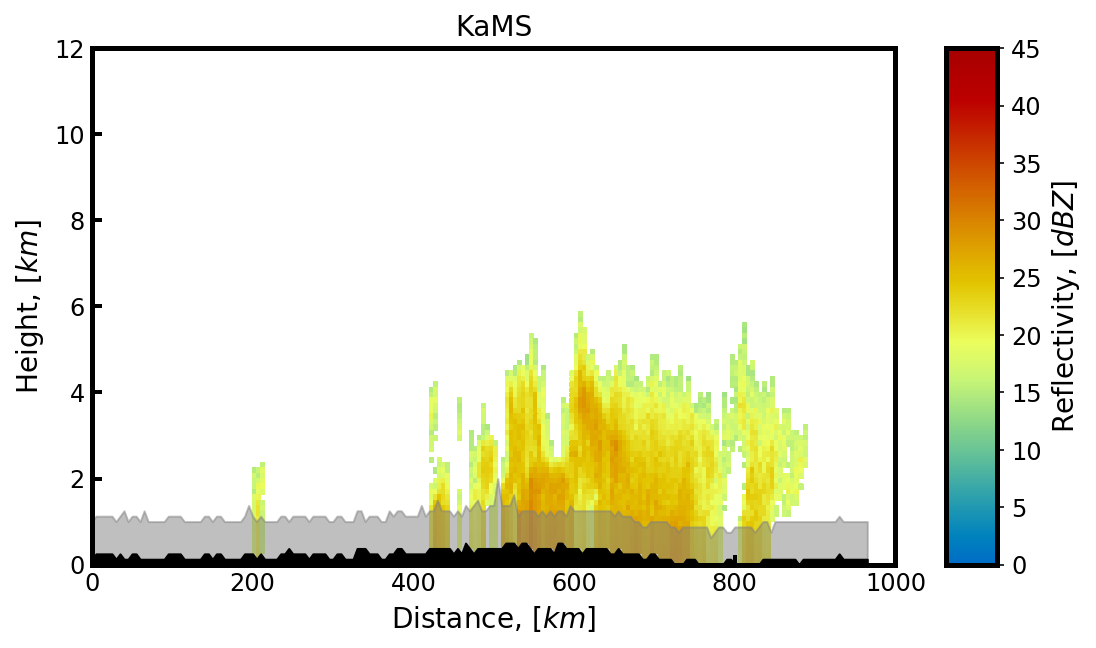

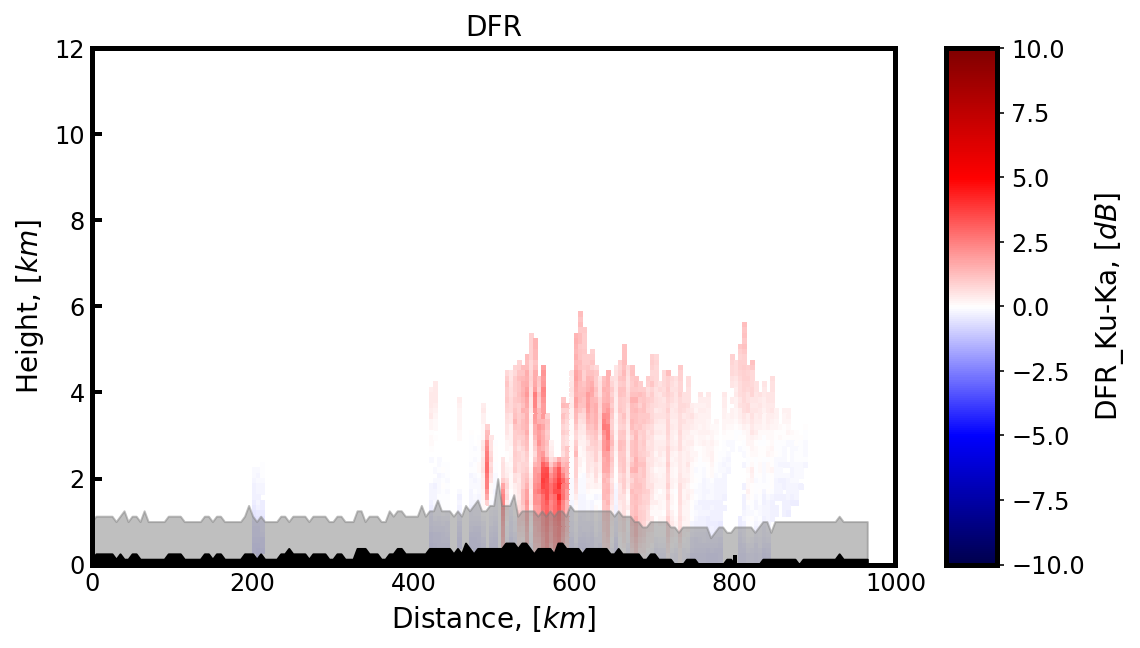

In [7]:
gpmtools.GPMDPR_profile(filename,band='Ku',Kuray = 24, Karay=12,
                    figsize=(9,4.75),lw = 3,cmap =cmaps.HomeyerRainbow,zoom=1,lat_0 = '41.5',
                    lon_0 = '280',vmin=0,vmax=45)
gpmtools.GPMDPR_profile(filename,band='Ka',Kuray = 24, Karay=12,
                    figsize=(9,4.75),lw = 3,cmap =cmaps.HomeyerRainbow,zoom=1,lat_0 = '41.5',
                    lon_0 = '280',vmin=0,vmax=45)
gpmtools.GPMDPR_profile(filename,band='DFR',Kuray = 24, Karay=12,
                    figsize=(9,4.75),lw = 3,cmap ='seismic',zoom=1,lat_0 = '41.5',
                    lon_0 = '280',vmin=-10,vmax=10)

# Raw profiles (only Ku and DFR)

not sure why i didnt do ka raw... 


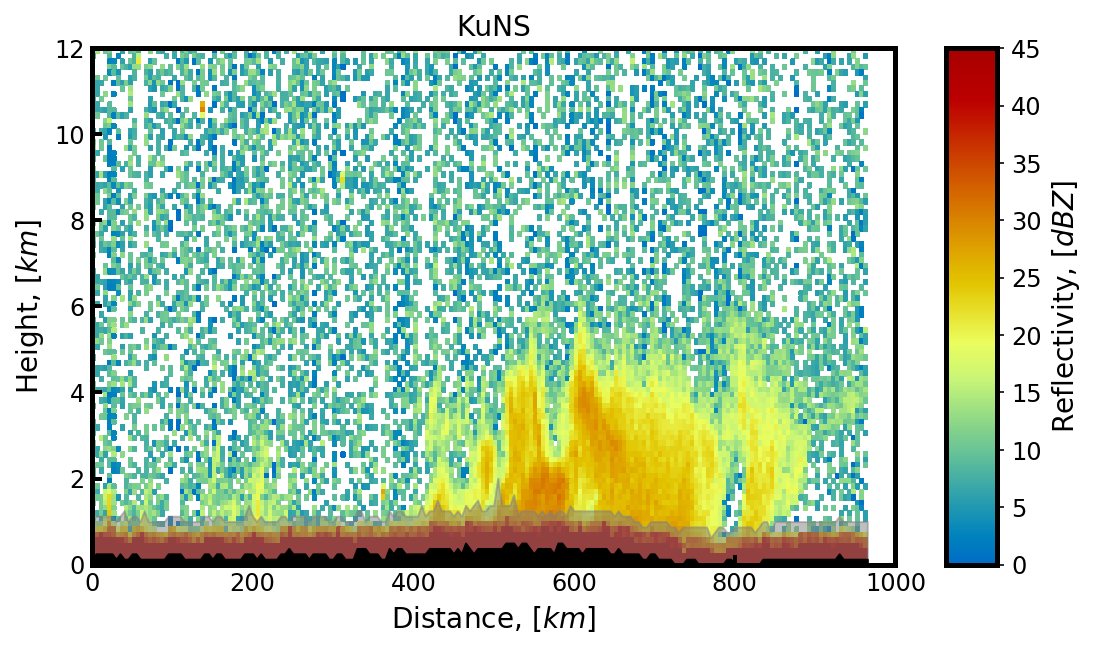

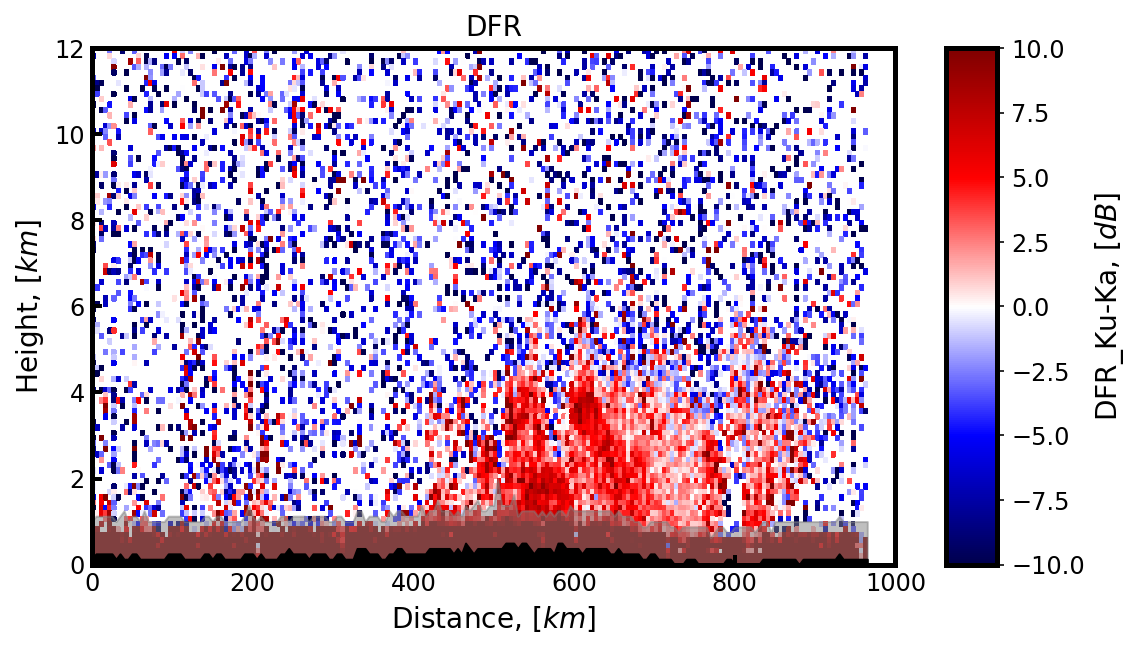

In [9]:
gpmtools.GPMDPR_profile(filename,band='raw',Kuray = 24, Karay=12,
                    figsize=(9,4.75),lw = 3,cmap =cmaps.HomeyerRainbow,zoom=1,lat_0 = '41.5',
                    lon_0 = '280',vmin=0,vmax=45)
gpmtools.GPMDPR_profile(filename,band='DFR_raw',Kuray = 24, Karay=12,
                    figsize=(9,4.75),lw = 3,cmap ='seismic',zoom=1,lat_0 = '41.5',
                    lon_0 = '280',vmin=-10,vmax=10)

# Really ugly plots that let you see all rays

In [14]:
NS = data['NS_Ku']
MS = data['MS_Ka']
zoom=1
a1 = 400000.*zoom
lat_0 = '41.5'
lon_0 = '280'
area_def = pr.geometry.AreaDefinition('areaD', 'IPHEx', 'areaD',
        {'a': '6378144.0', 'b': '6356759.0','lat_0': lat_0, 'lat_ts': lat_0,'lon_0': lon_0, 'proj': 'stere'},400, 400,
        [-a1, -a1,a1, a1])

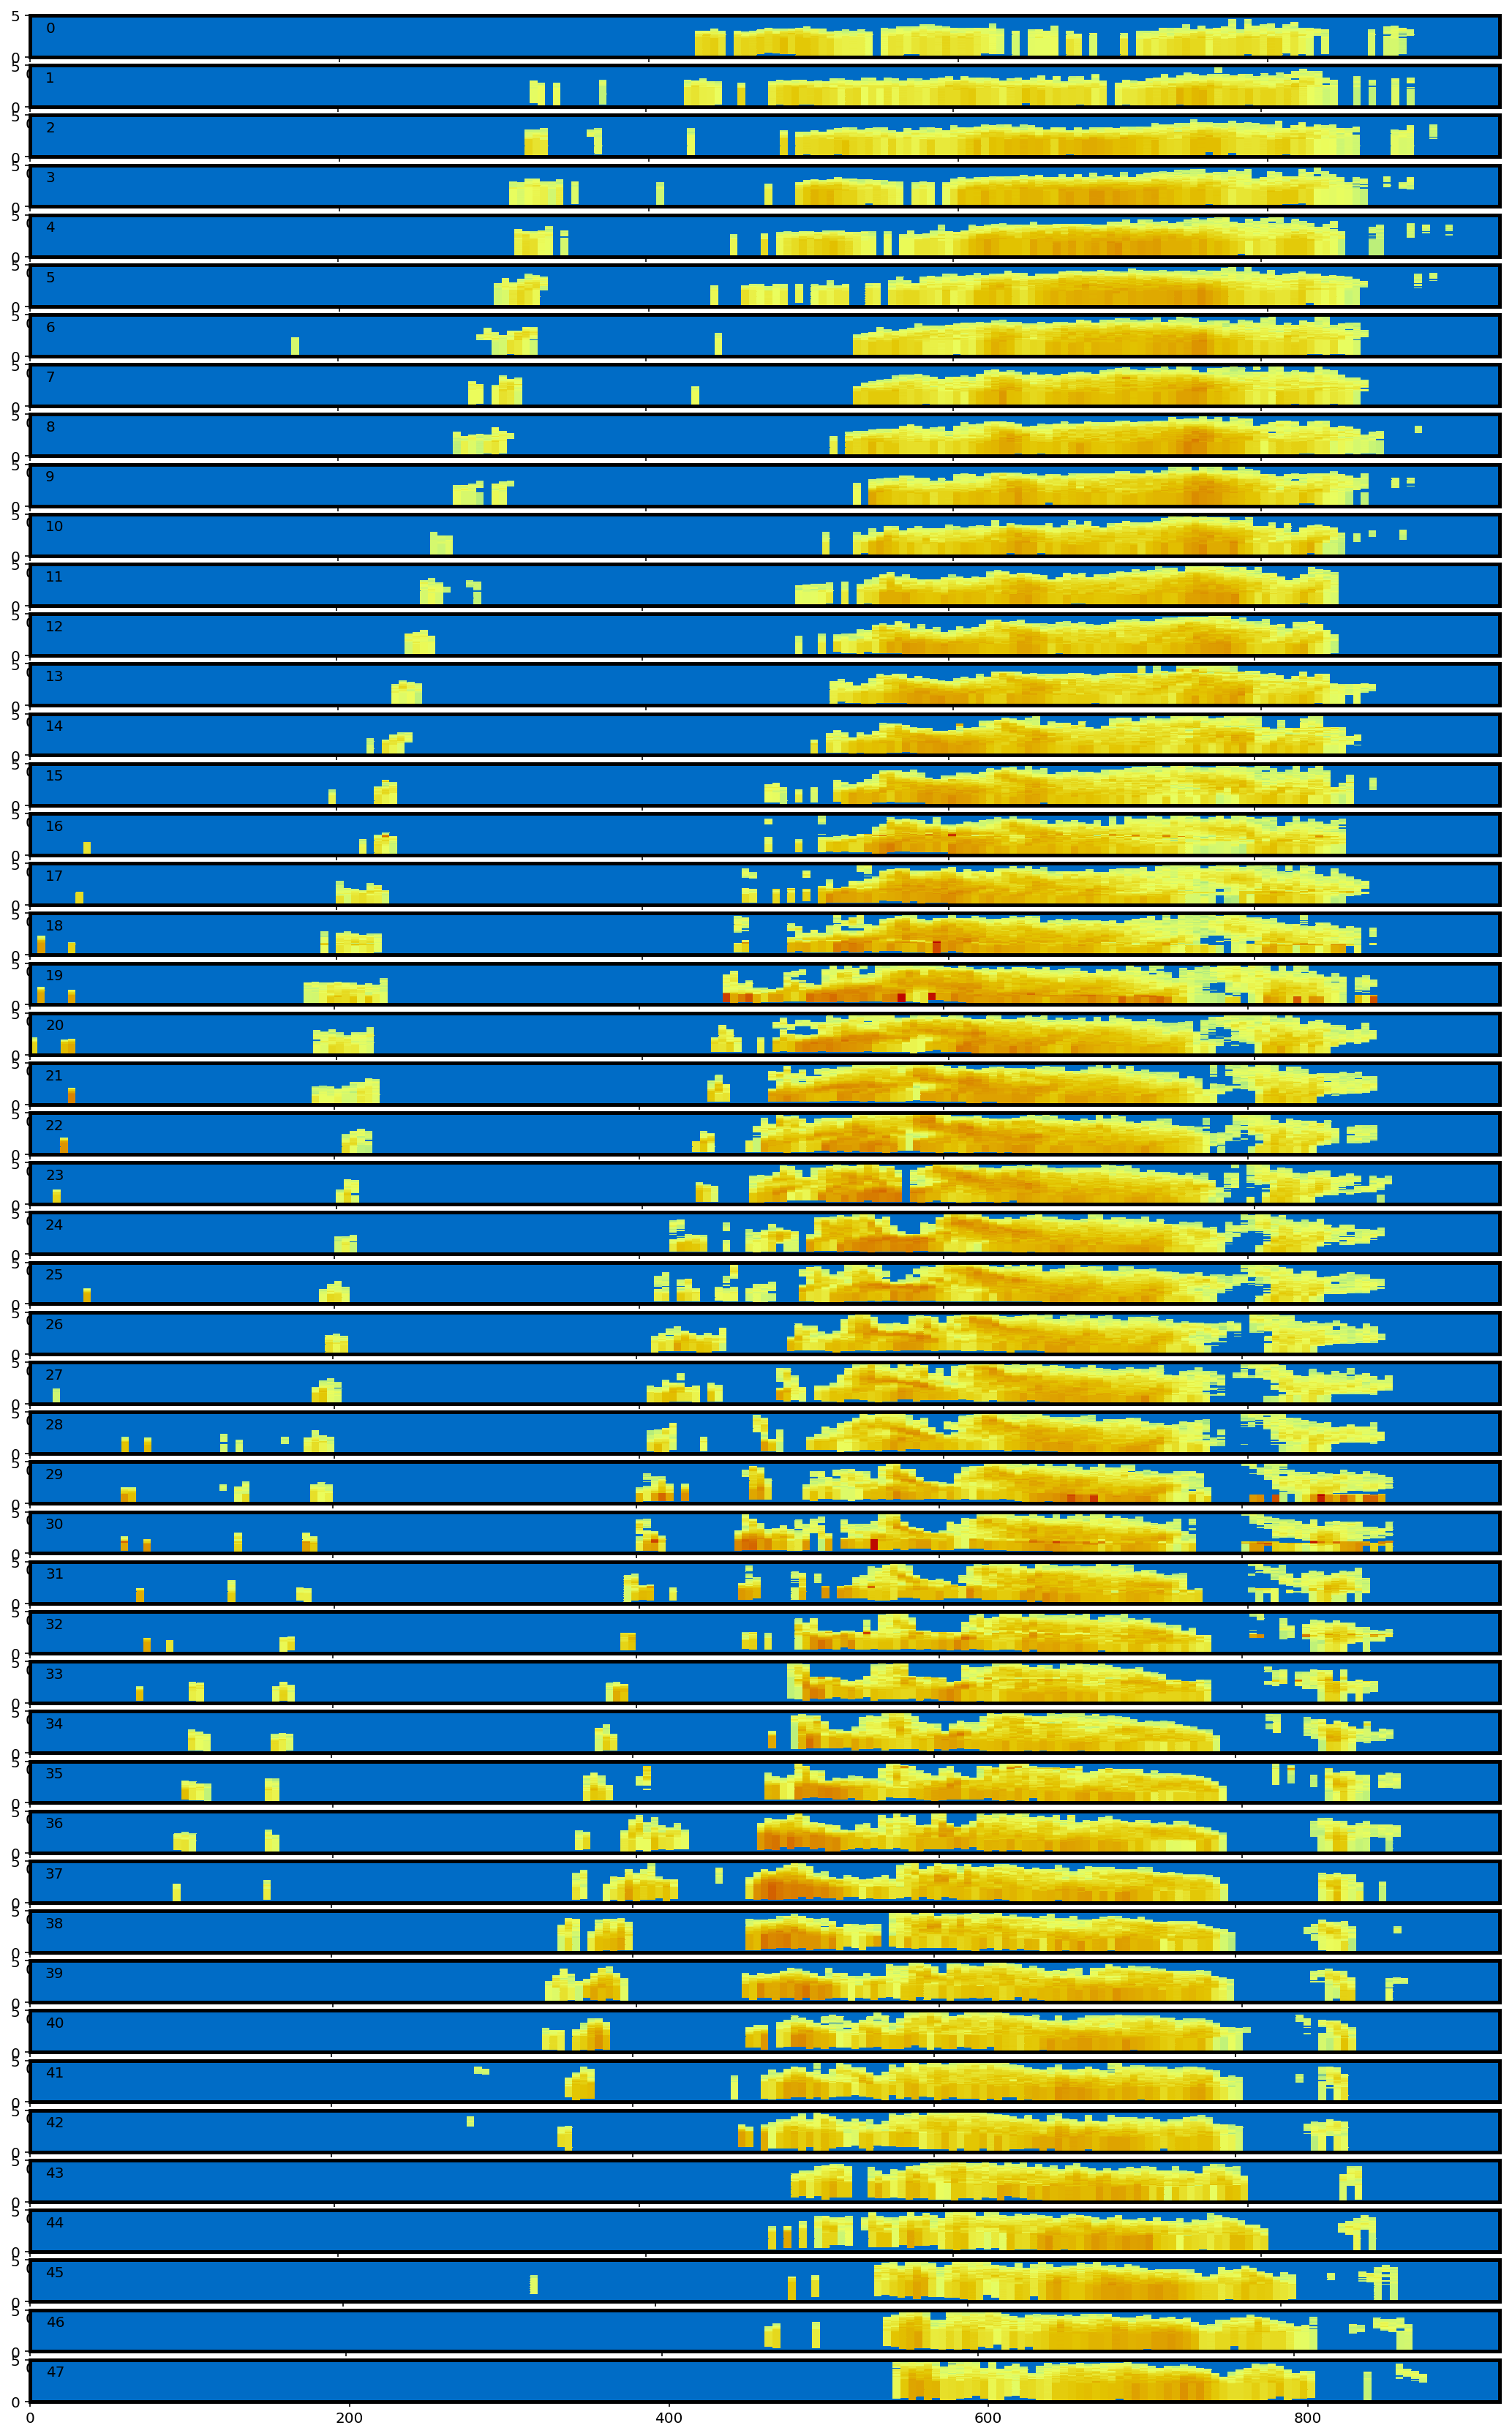

In [17]:
grid_lons, grid_lats = area_def.get_lonlats()

maxlon=grid_lons.max()
maxlat=grid_lats.max()
minlon=grid_lons.min()
minlat=grid_lats.min()
cmap=cmaps.HomeyerRainbow
vmin=0
vmax=45


swath_def = pr.geometry.SwathDefinition(lons=NS['Longitude'], lats=NS['Latitude'])

result=pr.kd_tree.resample_nearest(swath_def, NS['zFactorCorrectedNearSurface'], area_def,radius_of_influence=5000, fill_value=np.NAN)
fig,axes = plt.subplots(48,1,figsize=(18,30))

for i in np.arange(0,48,1):
    ray = i
    ax = axes[i]
    indx=np.where((NS['Latitude'][:,ray] > minlat) & (NS['Latitude'][:,ray] < maxlat) \
              & (NS['Longitude'][:,ray] > minlon) & (NS['Longitude'][:,ray] < maxlon))
    ax.pcolormesh(5.*np.arange(len(indx[0])),.125*np.arange(175,-1,-1),np.transpose(np.squeeze(NS['zFactorCorrected'][indx,ray,:])),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_ylim([0,5])
    ax.text(10,3,str(i))

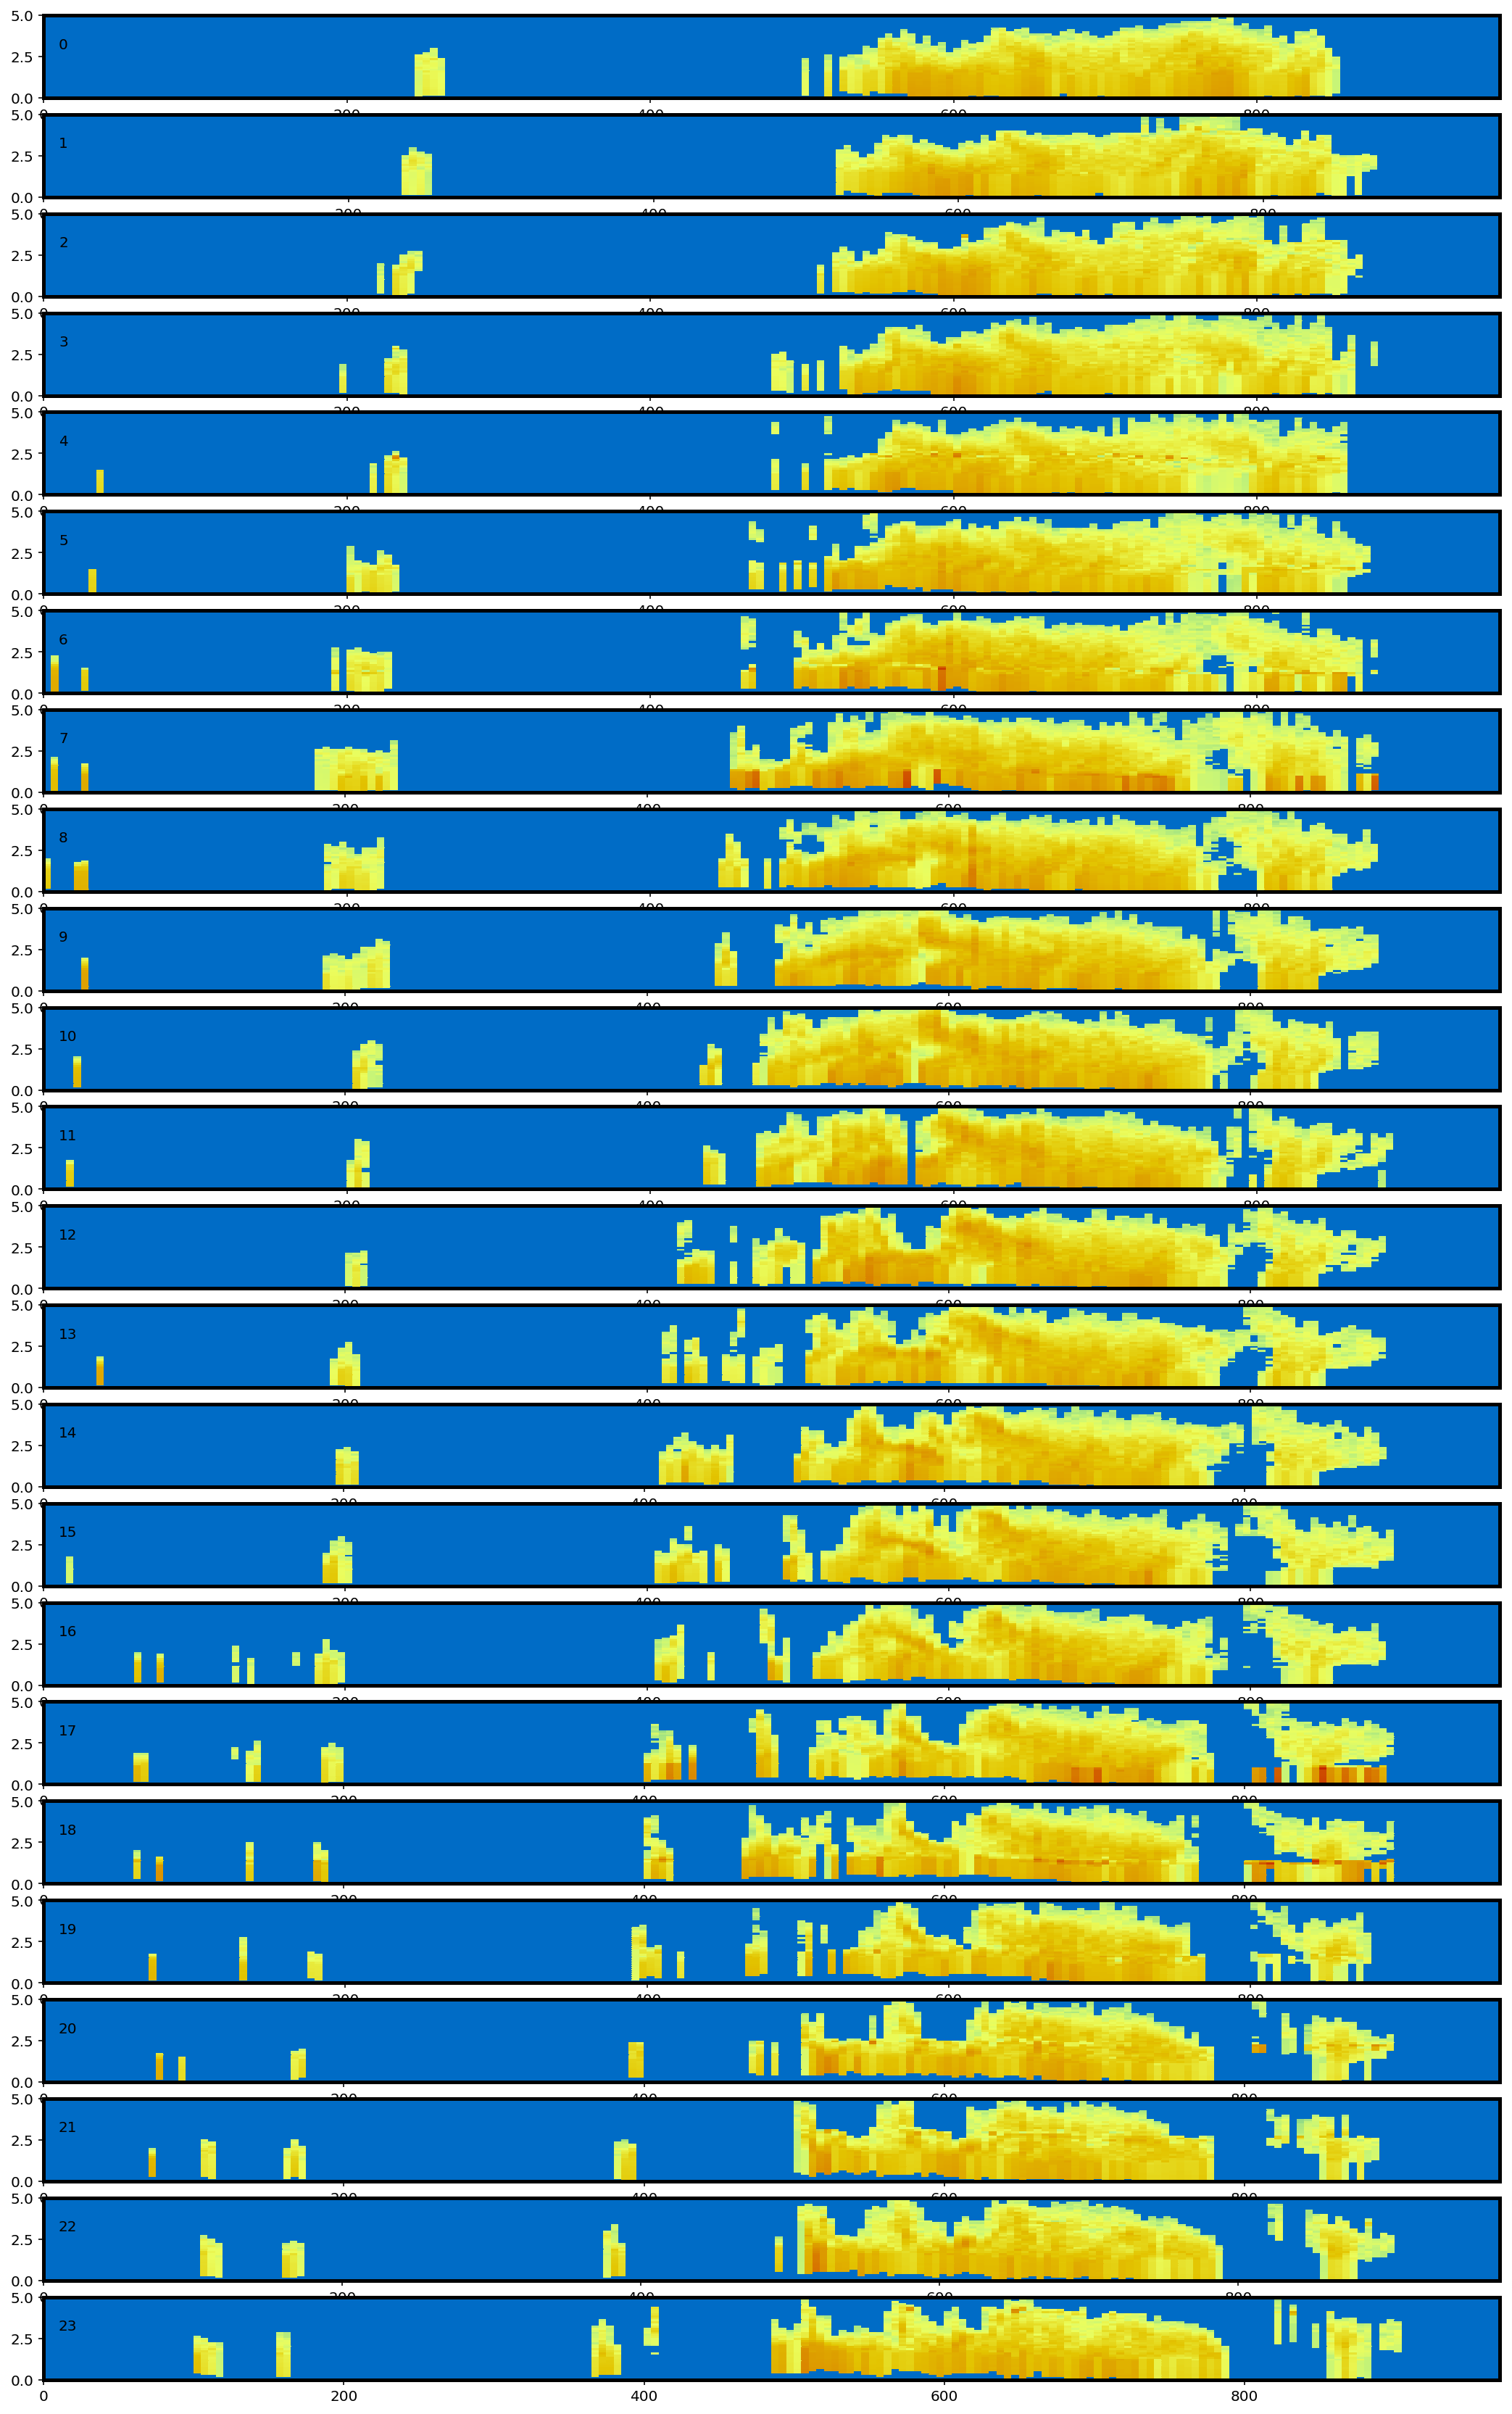

In [18]:
swath_def = pr.geometry.SwathDefinition(lons=MS['Longitude'], lats=MS['Latitude'])

result=pr.kd_tree.resample_nearest(swath_def, MS['zFactorCorrectedNearSurface'], area_def,radius_of_influence=5000, fill_value=np.NAN)
fig,axes = plt.subplots(24,1,figsize=(18,30))

for i in np.arange(0,24,1):
    ray = i
    ax = axes[i]
    indx=np.where((MS['Latitude'][:,ray] > minlat) & (MS['Latitude'][:,ray] < maxlat) \
              & (MS['Longitude'][:,ray] > minlon) & (MS['Longitude'][:,ray] < maxlon))
    ax.pcolormesh(5.*np.arange(len(indx[0])),.125*np.arange(175,-1,-1),np.transpose(np.squeeze(MS['zFactorCorrected'][indx,ray,:])),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_ylim([0,5])
    ax.text(10,3,str(i))